## NAME CLASSIFICATION USING RECURSIVE NN

In [1]:
import torch
import random
import torch.nn as nn
from model import RecursiveNN 
from data import load_data, name_to_tree
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
category_lines, all_categories = load_data()
n_categories = len(all_categories)
model = RecursiveNN(input_size=57, hidden_size=256, output_size=n_categories).to(device) 
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [3]:
def random_training_example():
    category = random.choice(all_categories)
    name = random.choice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long).to(device)
    name_tensor = name_to_tree(name, device) 
    return category_tensor, name_tensor


def train(n_iters=100000):
    model.train()
    training_losses = []
    current_loss = 0
    for iter in range(1, n_iters + 1):
        category_tensor, name_tensor = random_training_example()
        optimizer.zero_grad()
        output = model.classify(name_tensor)
        loss = criterion(output, category_tensor)
        loss.backward()
        optimizer.step()

        current_loss += loss.item()

        if iter % 500 == 0:
            print(f"Epoch: {iter} | Loss: {(current_loss / 500)}")
            training_losses.append(current_loss / 500)
            current_loss = 0

    plt.plot(range(len(training_losses)), training_losses)
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()
    torch.save(model.state_dict(), "model.pth")


Epoch: 500 | Loss: 2.8811125955581667
Epoch: 1000 | Loss: 2.8601802282333373
Epoch: 1500 | Loss: 2.7899736411571503
Epoch: 2000 | Loss: 2.652346533060074
Epoch: 2500 | Loss: 2.6033079116344453
Epoch: 3000 | Loss: 2.617909018754959
Epoch: 3500 | Loss: 2.5344665360450747
Epoch: 4000 | Loss: 2.5305703296661375
Epoch: 4500 | Loss: 2.56060038626194
Epoch: 5000 | Loss: 2.5794625157117843
Epoch: 5500 | Loss: 2.529396530508995
Epoch: 6000 | Loss: 2.5234712277650835
Epoch: 6500 | Loss: 2.5160753380060195
Epoch: 7000 | Loss: 2.5318394602537153
Epoch: 7500 | Loss: 2.46067814385891
Epoch: 8000 | Loss: 2.416093343615532
Epoch: 8500 | Loss: 2.384964517235756
Epoch: 9000 | Loss: 2.289504028201103
Epoch: 9500 | Loss: 2.229890639603138
Epoch: 10000 | Loss: 2.201477112799883
Epoch: 10500 | Loss: 2.2321336432397367
Epoch: 11000 | Loss: 2.059481462776661
Epoch: 11500 | Loss: 2.036279888652265
Epoch: 12000 | Loss: 2.029946470461786
Epoch: 12500 | Loss: 1.988767656981945
Epoch: 13000 | Loss: 1.8730553214401

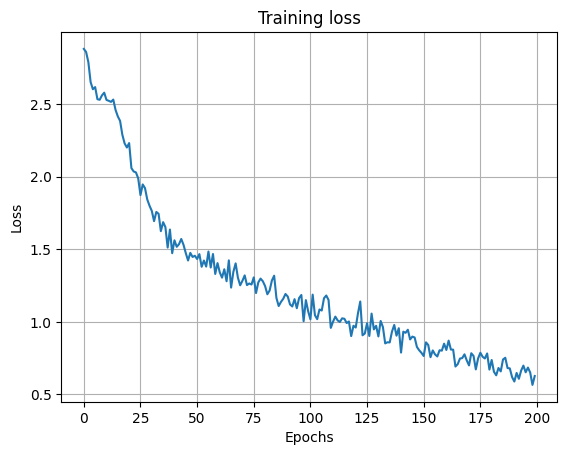

In [4]:
if __name__ == "__main__":
    train()